In [2]:
import sys
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# import  

import numpy as np
import seaborn as sns

import faiss
from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# !{sys.executable} -m pip install mlxtend
from time import time

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_val_score


import sklearn.neural_network as sknet

from sklearn.neural_network import MLPClassifier

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

In [3]:
# from keras import mnist
# # data = mnist.fashion_mnist.load_data()
# from mnist.loader import MNIST

import tensorflow as tf 

data = tf.keras.datasets.fashion_mnist.load_data()


Import data and split

In [4]:
(X_train, y_train), (X_test, y_test) = data
len(X_train)

60000

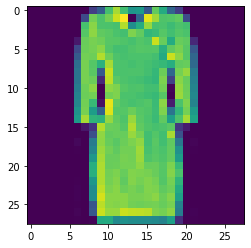

In [5]:
image=X_train[9000]
plt.imshow(image)
plt.show()

In [20]:
boots = np.where(y_train == 9)

boots_imgs = X_train[boots]

pullover = np.where(y_train == 2)

pulover_imgs = X_train[pullover]

shirt = np.where(y_train == 6)

shirt_img = X_train[shirt]

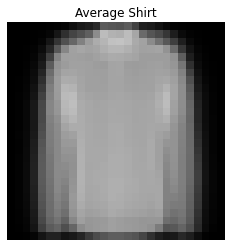

In [23]:
def find_mean_img(full_mat, title, size = (28, 28)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(shirt_img, 'Shirt')


Text(0, 0.5, 'Density')

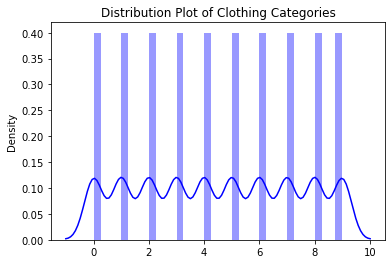

In [6]:
# y_df = pd.DataFrame(y_train, columns = ['label'])
# y_df.label.value_counts().sort_values().plot(kind = 'barh')

ax = sns.distplot(y_train, hist=True, color="b")
plt.title("Distribution Plot of Clothing Categories") 
plt.ylabel("Density")

In [7]:
#reshape data for Knn and SVG Softmax Classifier
x_tr = X_train.flatten().reshape((60000, 28*28))


x_te = X_test.flatten().reshape((10000, 28*28))

In [8]:
#scale data for better use
scaler = StandardScaler() 

scaled = scaler.fit(x_tr)

x_train_scaled = scaler.transform(x_tr)

x_test_scaled= scaler.transform(x_te)




In [9]:
#Create one-hot encoding of Y labels 

y_train_one_hot = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()

y_test_one_hot = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).toarray()

In [119]:
#take small samples of the data 

**K-nearest Neighbors Classifer** 

In [11]:
#try a faster :

class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.astype(np.float32))
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions

**see which parameters are best for Knn** 


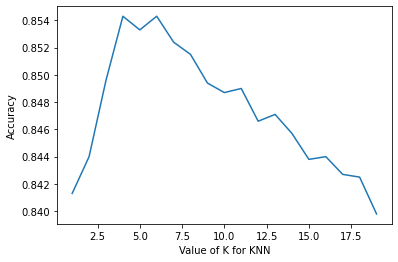

In [12]:


k_range = range(1, 20)
k_scores = []
for k in k_range:
    Fnn = FaissKNeighbors(k=k)
    Fnn.fit(x_train_scaled, y_train)
    p = Fnn.predict(x_test_scaled)
    scores = accuracy_score(y_test, p) 
    k_scores.append(scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

In [13]:
fNN = FaissKNeighbors(k = 4)
fNN.fit(x_train_scaled, y_train)


In [14]:
# x_test_scaled_f = x_test_scaled.flatten()

p_test = fNN.predict(x_test_scaled)

p_train = fNN.predict(x_train_scaled)

In [26]:

from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [28]:

# computing and printing out the accuracy metrics
#     for the training and test sets.
train_accuracy = accuracy_score(y_train, p_train)
train_error = 1 - train_accuracy
train_f1 = f1_score(y_train, p_train, average = 'micro')
train_auc = multiclass_roc_auc_score(y_train, p_train) 


print('\t'"Training Scores:")
print('\t''\t'"Accuracy:", train_accuracy)
print('\t''\t'"Error:", train_error)
print('\t''\t'"F1 Score:", train_f1)
print('\t''\t'"AUC Score:", train_auc)
print('\n')

test_accuracy = accuracy_score(y_test, p_test)
test_error = 1 - test_accuracy
test_f1 = f1_score(y_test, p_test, average = 'micro')
test_auc = multiclass_roc_auc_score(y_test, p_test)

print('\t'"Testing Scores:")
print('\t''\t'"Accuracy:", test_accuracy)
print('\t''\t'"Error:", test_error)
print('\t''\t'"F1 Score:", test_f1)
print('\t''\t'"AUC Score:", test_auc)
print('\n')

	Training Scores:
		Accuracy: 0.91095
		Error: 0.08904999999999996
		F1 Score: 0.91095
		AUC Score: 0.9505277777777777


	Testing Scores:
		Accuracy: 0.8543
		Error: 0.14570000000000005
		F1 Score: 0.8543
		AUC Score: 0.9190555555555557




[[877   0  13  19   6   0  78   1   6   0]
 [  7 970   4  11   5   0   3   0   0   0]
 [ 26   1 819   9  74   0  70   0   1   0]
 [ 49   9  12 861  28   0  40   0   1   0]
 [  6   0 121  34 750   0  87   0   2   0]
 [  1   0   0   2   0 877   5  64   2  49]
 [214   1 124  22  88   0 548   0   3   0]
 [  0   0   0   0   0   4   0 966   0  30]
 [  9   0  12   4   7   4  23  11 927   3]
 [  1   0   0   0   0   4   0  47   0 948]]


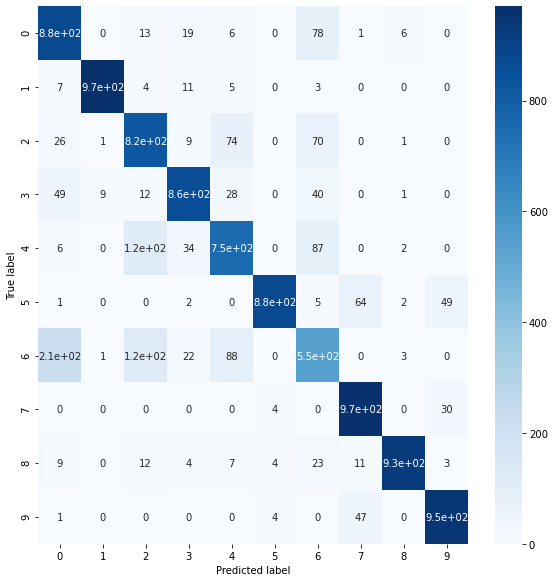

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.82      0.78      1000
           3       0.90      0.86      0.88      1000
           4       0.78      0.75      0.77      1000
           5       0.99      0.88      0.93      1000
           6       0.64      0.55      0.59      1000
           7       0.89      0.97      0.92      1000
           8       0.98      0.93      0.95      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [31]:

cm = confusion_matrix(y_test, p_test)

cr = (classification_report(y_test, p_test, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
print(cm)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(cr)

In [ ]:
# y_pred = clf.predict(x_te)

In [ ]:
# print(classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

**Multi output logistic regression** 

In [32]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 3000)

In [33]:
model.fit(x_train_scaled, y_train)

C:\Users\bekad\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred_mlr = model.predict(x_test_scaled)
pred_mlr_train = model.predict(x_train_scaled)


In [35]:

# computing and printing out the accuracy metrics
#     for the training and test sets.
train_accuracy = accuracy_score(y_train, pred_mlr_train)
train_error = 1 - train_accuracy
train_f1 = f1_score(y_train, pred_mlr_train, average = 'micro')
train_auc = multiclass_roc_auc_score(y_train, pred_mlr_train) 


print('\t'"Training Scores:")
print('\t''\t'"Accuracy:", train_accuracy)
print('\t''\t'"Error:", train_error)
print('\t''\t'"F1 Score:", train_f1)
print('\t''\t'"AUC Score:", train_auc)
print('\n')

test_accuracy = accuracy_score(y_test, pred_mlr)
test_error = 1 - test_accuracy
test_f1 = f1_score(y_test, pred_mlr, average = 'micro')
test_auc = multiclass_roc_auc_score(y_test, pred_mlr)

print('\t'"Testing Scores:")
print('\t''\t'"Accuracy:", test_accuracy)
print('\t''\t'"Error:", test_error)
print('\t''\t'"F1 Score:", test_f1)
print('\t''\t'"AUC Score:", test_auc)
print('\n')

	Training Scores:
		Accuracy: 0.8873333333333333
		Error: 0.11266666666666669
		F1 Score: 0.8873333333333333
		AUC Score: 0.9374074074074074


	Testing Scores:
		Accuracy: 0.8343
		Error: 0.16569999999999996
		F1 Score: 0.8343
		AUC Score: 0.9079444444444444




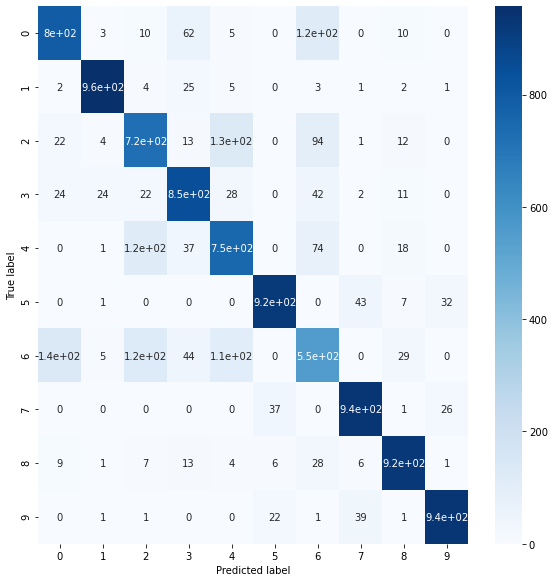

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.72      0.72      0.72      1000
           3       0.81      0.85      0.83      1000
           4       0.73      0.75      0.74      1000
           5       0.93      0.92      0.93      1000
           6       0.61      0.55      0.58      1000
           7       0.91      0.94      0.92      1000
           8       0.91      0.93      0.92      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [ ]:


cm = confusion_matrix(y_test, pred_mlr)
accuracy = accuracy_score(y_test, pred_mlr)

cr = (classification_report(y_test, pred_mlr, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(cr)

**SGD Classifer** 

In [ ]:
sgd = SGDClassifier()

In [ ]:
# sgd.fit(x_tr, y_train)
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

In [ ]:
# build a classifier
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", fit_intercept=True)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": loguniform(1e-2, 1e0),
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    sgd, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(x_train_scaled, y_train)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


RandomizedSearchCV took 8109.36 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.822 (std: 0.003)
Parameters: {'alpha': 0.053360561210244496, 'average': False, 'l1_ratio': 0.014919115419067541}

Model with rank: 2
Mean validation score: 0.817 (std: 0.004)
Parameters: {'alpha': 0.03058457662435437, 'average': False, 'l1_ratio': 0.07517144367277018}

Model with rank: 3
Mean validation score: 0.814 (std: 0.005)
Parameters: {'alpha': 0.011043319746202826, 'average': False, 'l1_ratio': 0.23535042580826215}



In [ ]:
#Try different learning rates and print accruacy
alphas = [0.01, 0.1, 1, .5]



for p in alphas:
    print("for learning rate:", p)
    sgd = SGDClassifier(max_iter = 1000, alpha= p) 
    sgd.fit(x_train_scaled, y_train)
    y_pred_sgd = sgd.predict(x_test_scaled) 
    print("Accuracy: ", accuracy_score(y_test, y_pred_sgd))

for learning rate: 0.01
Accuracy:  0.8236
for learning rate: 0.1
Accuracy:  0.8183
for learning rate: 1
Accuracy:  0.779
for learning rate: 0.5
Accuracy:  0.794


In [37]:
# the best model 
sgd_final  = SGDClassifier(max_iter=1000, alpha=.01)

In [38]:

sgd_final.fit(x_train_scaled, y_train)



SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
y_pred_sgd = sgd_final.predict(x_test_scaled)
# cm = confusion_matrix(y_test, y_pred_sgd)
# accuracy = accuracy_score(y_test, y_pred_sgd)
# print(accuracy)
y_pred_sgd_tr = sgd_final.predict(x_train_scaled)




# computing and printing out the accuracy metrics
#     for the training and test sets.
train_accuracy = accuracy_score(y_train, y_pred_sgd_tr)
train_error = 1 - train_accuracy
train_f1 = f1_score(y_train, y_pred_sgd_tr, average = 'micro')
train_auc = multiclass_roc_auc_score(y_train, y_pred_sgd_tr) 


print('\t'"Training Scores:")
print('\t''\t'"Accuracy:", train_accuracy)
print('\t''\t'"Error:", train_error)
print('\t''\t'"F1 Score:", train_f1)
print('\t''\t'"AUC Score:", train_auc)
print('\n')

test_accuracy = accuracy_score(y_test, y_pred_sgd)
test_error = 1 - test_accuracy
test_f1 = f1_score(y_test, y_pred_sgd, average = 'micro')
test_auc = multiclass_roc_auc_score(y_test, y_pred_sgd)

print('\t'"Testing Scores:")
print('\t''\t'"Accuracy:", test_accuracy)
print('\t''\t'"Error:", test_error)
print('\t''\t'"F1 Score:", test_f1)
print('\t''\t'"AUC Score:", test_auc)
print('\n')

	Training Scores:
		Accuracy: 0.8352333333333334
		Error: 0.16476666666666662
		F1 Score: 0.8352333333333334
		AUC Score: 0.9084629629629628


	Testing Scores:
		Accuracy: 0.8214
		Error: 0.17859999999999998
		F1 Score: 0.8214
		AUC Score: 0.9007777777777777




0.822
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.98      0.94      0.96      1000
           2       0.68      0.73      0.71      1000
           3       0.76      0.88      0.81      1000
           4       0.71      0.71      0.71      1000
           5       0.93      0.90      0.91      1000
           6       0.60      0.51      0.55      1000
           7       0.89      0.92      0.91      1000
           8       0.91      0.94      0.92      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



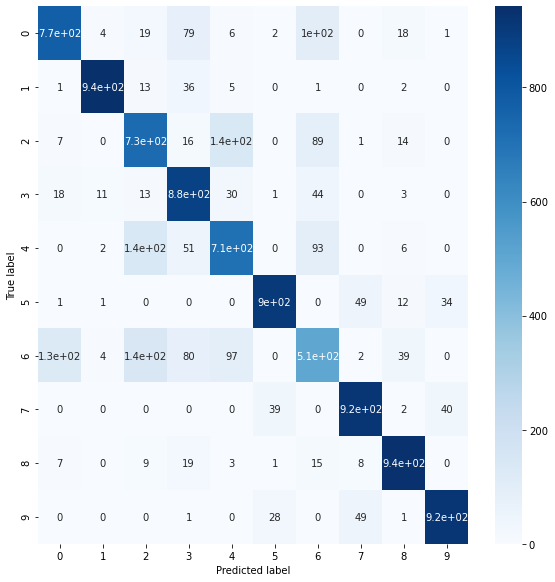

In [ ]:
y_pred_sgd = sgd_final.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred_sgd)
accuracy = accuracy_score(y_test, y_pred_sgd)
print(accuracy)
cr = (classification_report(y_test, y_pred_sgd, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
print(cr)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Multi Layer Perceptron** 

In [40]:
from keras.layers import Dense 
from keras.models import Sequential 

image_size = 784 
num_classes = 10 

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=512, activation='relu', input_shape=(image_size,)))

#output layer
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [42]:
#try another MLP
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=2048, activation='relu', input_shape=(image_size,)))

#another hidden layer
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=128, activation='relu'))


#output layer
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 4,297,610
Trainable params: 4,297,610
Non-trainable params: 0
_________________________________________________________________


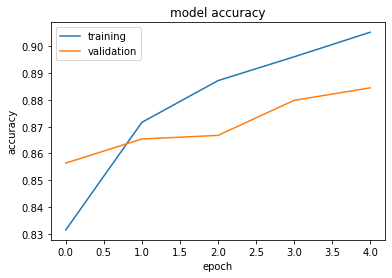

Test loss: 0.349
Test accuracy: 0.877


In [43]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train_one_hot, batch_size=128, epochs=5, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(x_test_scaled, y_test_one_hot, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [44]:

y_pred=model.predict(x_test_scaled)

y_pred_ff = np.argmax(y_pred, axis=1)


y_pred_tr=model.predict(x_train_scaled)

y_pred_ff_Tr = np.argmax(y_pred_tr, axis=1)


In [45]:
# computing and printing out the accuracy metrics
#     for the training and test sets.
train_accuracy = accuracy_score(y_train, y_pred_ff_Tr)
train_error = 1 - train_accuracy
train_f1 = f1_score(y_train, y_pred_ff_Tr, average = 'micro')
train_auc = multiclass_roc_auc_score(y_train, y_pred_ff_Tr) 


print('\t'"Training Scores:")
print('\t''\t'"Accuracy:", train_accuracy)
print('\t''\t'"Error:", train_error)
print('\t''\t'"F1 Score:", train_f1)
print('\t''\t'"AUC Score:", train_auc)
print('\n')

test_accuracy = accuracy_score(y_test, y_pred_ff)
test_error = 1 - test_accuracy
test_f1 = f1_score(y_test, y_pred_ff, average = 'micro')
test_auc = multiclass_roc_auc_score(y_test, y_pred_ff)

print('\t'"Testing Scores:")
print('\t''\t'"Accuracy:", test_accuracy)
print('\t''\t'"Error:", test_error)
print('\t''\t'"F1 Score:", test_f1)
print('\t''\t'"AUC Score:", test_auc)
print('\n')

	Training Scores:
		Accuracy: 0.91255
		Error: 0.08745000000000003
		F1 Score: 0.91255
		AUC Score: 0.9514166666666666


	Testing Scores:
		Accuracy: 0.8772
		Error: 0.12280000000000002
		F1 Score: 0.8771999999999999
		AUC Score: 0.9317777777777776




              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.84      0.76      0.80      1000
           3       0.86      0.91      0.88      1000
           4       0.80      0.81      0.81      1000
           5       0.98      0.92      0.95      1000
           6       0.69      0.70      0.69      1000
           7       0.94      0.94      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



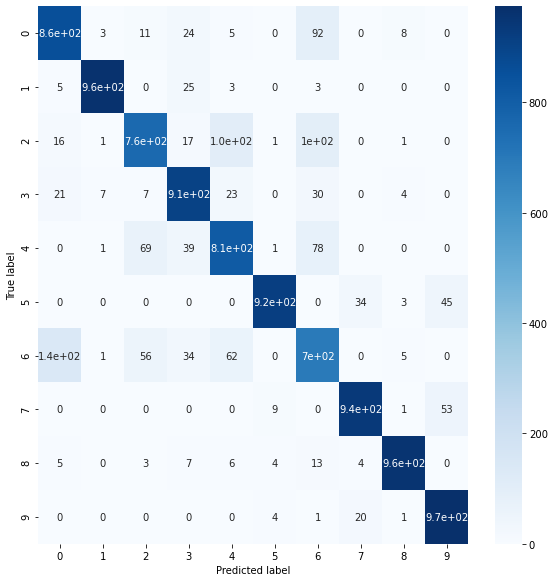

In [49]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_ff)

cr = (classification_report(y_test, y_pred_ff, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

print(cr)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**CNN Architectures** 

try a number of CNN architectures to see what gets the best result

In [46]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Convolution2D


from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation 


from keras.layers import Flatten


Try a simple CNN model

In [47]:
#reformat data
train_images = X_train.reshape((60000, 28, 28, 1))
test_images = X_test.reshape((10000, 28, 28, 1))

#scale 
train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [52]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=y_train, 
            epochs=5, 
            validation_data=(test_images, y_test))

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.6848 - accuracy: 0.7498 - val_loss: 0.3626 - val_accuracy: 0.8729
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3280 - accuracy: 0.8810 - val_loss: 0.3137 - val_accuracy: 0.8866
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2778 - accuracy: 0.8979 - val_loss: 0.2956 - val_accuracy: 0.8918
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2402 - accuracy: 0.9118 - val_loss: 0.2762 - val_accuracy: 0.8986
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2168 - accuracy: 0.9185 - val_loss: 0.2616 - val_accuracy: 0.9081


313/313 - 2s - loss: 0.2616 - accuracy: 0.9081


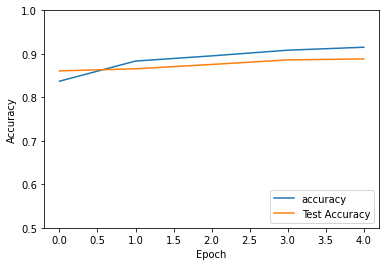

In [53]:
#eval
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)


In [48]:
#LeNet 

#another approach-- try padding 
#  Pad images with 0s
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

print("reshaped", train_images.shape)


reshaped (60000, 32, 32, 1)


In [1]:

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))

model.add(Dense(units=80, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=y_train, 
            epochs=5, 
            validation_data=(test_images, y_test))

NameError: name 'Sequential' is not defined

313/313 - 1s - loss: 0.3028 - accuracy: 0.8908


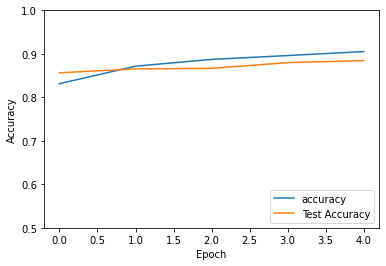

In [50]:
#eval
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)


              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.88      0.76      0.82      1000
           3       0.93      0.88      0.90      1000
           4       0.72      0.94      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.63      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



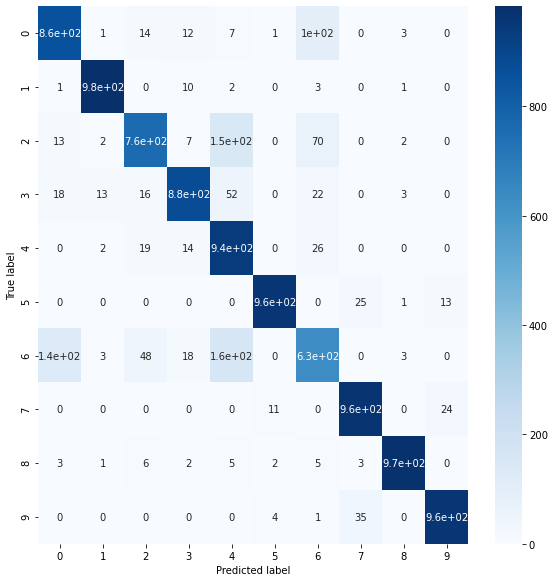

In [51]:

y_pred=model.predict(test_images)

y_pred_cnn = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_cnn)

cr = (classification_report(y_test, y_pred_cnn, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

print(cr)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:
# computing and printing out the accuracy metrics
#     for the training and test sets.
train_accuracy = accuracy_score(y_train, y_pred_ff_Tr)
train_error = 1 - train_accuracy
train_f1 = f1_score(y_train, y_pred_ff_Tr, average = 'micro')
train_auc = multiclass_roc_auc_score(y_train, y_pred_ff_Tr) 


print('\t'"Training Scores:")
print('\t''\t'"Accuracy:", train_accuracy)
print('\t''\t'"Error:", train_error)
print('\t''\t'"F1 Score:", train_f1)
print('\t''\t'"AUC Score:", train_auc)
print('\n')

test_accuracy = accuracy_score(y_test, y_pred_ff)
test_error = 1 - test_accuracy
test_f1 = f1_score(y_test, y_pred_ff, average = 'micro')
test_auc = multiclass_roc_auc_score(y_test, y_pred_ff)

print('\t'"Testing Scores:")
print('\t''\t'"Accuracy:", test_accuracy)
print('\t''\t'"Error:", test_error)
print('\t''\t'"F1 Score:", test_f1)
print('\t''\t'"AUC Score:", test_auc)
print('\n')

	Training Scores:
		Accuracy: 0.91255
		Error: 0.08745000000000003
		F1 Score: 0.91255
		AUC Score: 0.9514166666666666


	Testing Scores:
		Accuracy: 0.8772
		Error: 0.12280000000000002
		F1 Score: 0.8771999999999999
		AUC Score: 0.9317777777777776




0.5618